In [1]:
#!rm -rf /kaggle/working/p30gnn
!rm -rf /kaggle/working/*
!git clone -b data-augmentation --single-branch \
https://github.com/oskareriksandelin/p30gnn.git

Cloning into 'p30gnn'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 177 (delta 11), reused 20 (delta 10), pack-reused 136 (from 1)
Receiving objects: 100% (177/177), 705.80 KiB | 3.90 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [2]:
!pip install torch_geometric

In [3]:
!pwd
!ls


/kaggle/working
p30gnn


## LOAD THE DATA

In [4]:
!pip -q install gdown   

In [5]:
import gdown

In [6]:
folder_url = "https://drive.google.com/drive/folders/1y10KJqDBL5RhETXMChe48e93Q0oubGHn?usp=drive_link"
gdown.download_folder(folder_url, output="data", quiet=False, remaining_ok=True)

Retrieving folder contents


Processing file 19HVQoNILBqnfv7vvSdcTXirFptHNVlVX FeGd_data_POSCAR_2.zip
Processing file 15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT FeGd_data_POSCAR_3.zip
Processing file 1f__wyGmIioGC9WfimVaypb6HrmuJ06vq FeGd_data_POSCAR_4.zip
Processing file 1OmYIMRib6yYpWmxcagvhKVUVHJfoiVwh FeGd_data_POSCAR_5.zip
Processing file 1x71MDnwVG6QQ4Nm9Gan6Y2uUo3TDoIFG FeGd_data_POSCAR_6.zip
Processing file 1F4OvZB1U2P1OEOxvGdr_-6CnbpVpjrRi FeGd_data_POSCAR_7.zip
Processing file 1ybzjthY_8ZHUOzcjQ62Du9v24EW4Azct FeGd_data_POSCAR_8.zip
Processing file 1baE5wY5rFIQERD0l2tJFBK2vCtyQ2c5x FeGd_data_POSCAR_9.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=19HVQoNILBqnfv7vvSdcTXirFptHNVlVX
From (redirected): https://drive.google.com/uc?id=19HVQoNILBqnfv7vvSdcTXirFptHNVlVX&confirm=t&uuid=d58a6834-6835-4b82-9b7d-0503bc5d6fbd
To: /kaggle/working/data/FeGd_data_POSCAR_2.zip
100%|██████████| 278M/278M [00:03<00:00, 72.4MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT
From (redirected): https://drive.google.com/uc?id=15lcB99k6cYbt0HGnQj_g8QXtb3N2nCFT&confirm=t&uuid=6b2610a8-e65b-4da5-a1e7-ec13502256fe
To: /kaggle/working/data/FeGd_data_POSCAR_3.zip
100%|██████████| 34.7M/34.7M [00:00<00:00, 186MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1f__wyGmIioGC9WfimVaypb6HrmuJ06vq
From (redirected): https://drive.google.com/uc?id=1f__wyGmIioGC9WfimVaypb6HrmuJ06vq&confirm=t&uuid=20bf195e-64b5-43d0-9203-d58127ac0

['data/FeGd_data_POSCAR_2.zip',
 'data/FeGd_data_POSCAR_3.zip',
 'data/FeGd_data_POSCAR_4.zip',
 'data/FeGd_data_POSCAR_5.zip',
 'data/FeGd_data_POSCAR_6.zip',
 'data/FeGd_data_POSCAR_7.zip',
 'data/FeGd_data_POSCAR_8.zip',
 'data/FeGd_data_POSCAR_9.zip']

In [7]:
!pwd
!ls

/kaggle/working
data  p30gnn


In [8]:
!ls data

FeGd_data_POSCAR_2.zip	FeGd_data_POSCAR_5.zip	FeGd_data_POSCAR_8.zip
FeGd_data_POSCAR_3.zip	FeGd_data_POSCAR_6.zip	FeGd_data_POSCAR_9.zip
FeGd_data_POSCAR_4.zip	FeGd_data_POSCAR_7.zip


In [9]:
import zipfile
from pathlib import Path

data_path = Path("/kaggle/working/data")

for z in data_path.glob("*.zip"):
    with zipfile.ZipFile(z) as f:
        f.extractall(data_path)
    z.unlink()  # remove the zip file

In [10]:
!ls data

FeGd_data_POSCAR_2  FeGd_data_POSCAR_4	FeGd_data_POSCAR_6  FeGd_data_POSCAR_8
FeGd_data_POSCAR_3  FeGd_data_POSCAR_5	FeGd_data_POSCAR_7  FeGd_data_POSCAR_9


## Load the data

In [11]:
from p30gnn.FeGdSpinGNN.utils import normalize_data, compute_normalization_stats
from p30gnn.FeGdSpinGNN.augmentation import RandomRotationTransform
from p30gnn.FeGdSpinGNN.FeGd_dataset import FeGdMagneticDataset


In [12]:
# Data augmentation: random rotations
rotation_transform = RandomRotationTransform
cut_off = 0.3

train_dataset = FeGdMagneticDataset(data_path, systems=[2, 3, 4, 5], cutoff_dist=cut_off, transform_rotate=rotation_transform)
val_dataset = FeGdMagneticDataset(data_path, systems=[6, 7], cutoff_dist=cut_off)
test_dataset = FeGdMagneticDataset(data_path, systems=[8, 9], cutoff_dist=cut_off)

Loading systems: 100%|██████████| 2/2 [00:09<00:00,  4.83s/it]


In [13]:
def normalize_dataset(dataset, stats):
    normalized_list = [None]*len(dataset)
    for i, data in enumerate(dataset):
        normalized_list[i] = (normalize_data(data, stats))
    return normalized_list

# compute normalization stats
norm_stats = compute_normalization_stats(train_dataset)

train_data_norm = normalize_dataset(train_dataset, norm_stats)
val_data_norm = normalize_dataset(val_dataset, norm_stats)
test_data_norm = normalize_dataset(test_dataset, norm_stats)

# Model - augmented data

In [14]:
from p30gnn.FeGdSpinGNN.utils import normalize_data, compute_normalization_stats
from p30gnn.FeGdSpinGNN.FeGd_dataset import FeGdMagneticDataset

from p30gnn.FeGdSpinGNN.models import simple_gnn_model
from p30gnn.FeGdSpinGNN.utils import train_one_epoch, evaluate

import torch
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
from time import time

In [ ]:
# --- DATALOADERS ---
train_loader = DataLoader(train_data_norm, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data_norm,   batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data_norm,  batch_size=32, shuffle=False)

# --- MODEL ---

# Hyperparameters
hidden_dim = 32
num_layers = 5
dropout = 0.2
lr=5e-4
weight_decay=5e-3
num_epochs = 40

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

model = simple_gnn_model(
    input_dim=5, 
    hidden_dim=64, 
    output_dim=3, 
    num_layers=3, 
    edge_dim=4
    ).to(device)



optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    patience=10,
    factor=0.5,
    min_lr=1e-6
)

# --- TRAINING ---
best_val_loss = float('inf')
train_losses = []
val_losses = []
start_time = time()
for epoch in range(1, num_epochs + 1):
    train_loss = train_one_epoch(model, train_loader, optimizer, device)
    val_loss   = evaluate(model, val_loader, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"{epoch}/{num_epochs}   Train loss: {train_loss:.6f}    Val loss: {val_loss:.6f}    LR: {optimizer.param_groups[0]['lr']:.6f}")

    scheduler.step(val_loss)

    # save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")

train_time = time() - start_time
print(f"Training time: {train_time/60:.2f} minutes")


Using device: cuda


1/40   Train loss: 0.702482    Val loss: 0.837615    LR: 0.000500


2/40   Train loss: 0.307620    Val loss: 0.302392    LR: 0.000500


3/40   Train loss: 0.262539    Val loss: 0.262508    LR: 0.000500


4/40   Train loss: 0.250877    Val loss: 0.272122    LR: 0.000500


5/40   Train loss: 0.245489    Val loss: 0.238794    LR: 0.000500


6/40   Train loss: 0.244584    Val loss: 0.254711    LR: 0.000500


7/40   Train loss: 0.240606    Val loss: 0.253828    LR: 0.000500


8/40   Train loss: 0.237141    Val loss: 0.236036    LR: 0.000500


9/40   Train loss: 0.236009    Val loss: 0.265473    LR: 0.000500


10/40   Train loss: 0.234148    Val loss: 0.236923    LR: 0.000500


11/40   Train loss: 0.232847    Val loss: 0.263296    LR: 0.000500


12/40   Train loss: 0.232704    Val loss: 0.202970    LR: 0.000500


13/40   Train loss: 0.231631    Val loss: 0.233875    LR: 0.000500


14/40   Train loss: 0.231324    Val loss: 0.212360    LR: 0.000500


15/40   Train loss: 0.231255    Val loss: 0.219219    LR: 0.000500


16/40   Train loss: 0.231388    Val loss: 0.229819    LR: 0.000500


17/40   Train loss: 0.229214    Val loss: 0.241985    LR: 0.000500


18/40   Train loss: 0.228877    Val loss: 0.234169    LR: 0.000500


19/40   Train loss: 0.229567    Val loss: 0.225517    LR: 0.000500


20/40   Train loss: 0.229168    Val loss: 0.241675    LR: 0.000500


21/40   Train loss: 0.228714    Val loss: 0.226698    LR: 0.000500


22/40   Train loss: 0.227164    Val loss: 0.220545    LR: 0.000500


23/40   Train loss: 0.227801    Val loss: 0.237709    LR: 0.000500


24/40   Train loss: 0.224458    Val loss: 0.230719    LR: 0.000250


25/40   Train loss: 0.224825    Val loss: 0.218881    LR: 0.000250


26/40   Train loss: 0.224957    Val loss: 0.208354    LR: 0.000250


27/40   Train loss: 0.224347    Val loss: 0.220200    LR: 0.000250


28/40   Train loss: 0.224714    Val loss: 0.235287    LR: 0.000250


29/40   Train loss: 0.224131    Val loss: 0.216819    LR: 0.000250


30/40   Train loss: 0.224132    Val loss: 0.226757    LR: 0.000250


31/40   Train loss: 0.224783    Val loss: 0.218452    LR: 0.000250


32/40   Train loss: 0.223740    Val loss: 0.210785    LR: 0.000250


33/40   Train loss: 0.223797    Val loss: 0.230852    LR: 0.000250


34/40   Train loss: 0.224064    Val loss: 0.239997    LR: 0.000250


35/40   Train loss: 0.222776    Val loss: 0.220545    LR: 0.000125


36/40   Train loss: 0.222360    Val loss: 0.204645    LR: 0.000125


37/40   Train loss: 0.222675    Val loss: 0.209439    LR: 0.000125


38/40   Train loss: 0.222447    Val loss: 0.208702    LR: 0.000125


39/40   Train loss: 0.222411    Val loss: 0.215595    LR: 0.000125


40/40   Train loss: 0.223060    Val loss: 0.207288    LR: 0.000125
Training time: 2.97 minutes


In [ ]:
# Using device: cuda
                                                           
# 1/40   Train loss: 0.333666    Val loss: 0.207610    LR: 0.005000
                                                           
# 2/40   Train loss: 0.256700    Val loss: 0.229675    LR: 0.005000
                                                           
# 3/40   Train loss: 0.254055    Val loss: 0.457377    LR: 0.005000
                                                           
# 4/40   Train loss: 0.248502    Val loss: 0.301231    LR: 0.005000
                                                           
# 5/40   Train loss: 0.242030    Val loss: 0.226521    LR: 0.005000
                                                           
# 6/40   Train loss: 0.237403    Val loss: 0.287748    LR: 0.005000
                                                           
# 7/40   Train loss: 0.237810    Val loss: 0.248788    LR: 0.005000
                                                           
# 8/40   Train loss: 0.234800    Val loss: 0.227314    LR: 0.005000
                                                           
# 9/40   Train loss: 0.234428    Val loss: 0.290212    LR: 0.005000
                                                           
# 10/40   Train loss: 0.231009    Val loss: 0.253123    LR: 0.005000
                                                           
# 11/40   Train loss: 0.232300    Val loss: 0.240853    LR: 0.005000
                                                           
# 12/40   Train loss: 0.231476    Val loss: 0.220530    LR: 0.005000
                                                           
# 13/40   Train loss: 0.219971    Val loss: 0.230954    LR: 0.002500
                                                           
# 14/40   Train loss: 0.217533    Val loss: 0.212411    LR: 0.002500
                                                           
# 15/40   Train loss: 0.218809    Val loss: 0.220237    LR: 0.002500
                                                           
# 16/40   Train loss: 0.218786    Val loss: 0.220770    LR: 0.002500
                                                           
# 17/40   Train loss: 0.217305    Val loss: 0.236243    LR: 0.002500
                                                           
# 18/40   Train loss: 0.214374    Val loss: 0.237435    LR: 0.002500
                                                           
# 19/40   Train loss: 0.214372    Val loss: 0.195115    LR: 0.002500
                                                           
# 20/40   Train loss: 0.216474    Val loss: 0.248711    LR: 0.002500
                                                           
# 21/40   Train loss: 0.213571    Val loss: 0.268009    LR: 0.002500
                                                           
# 22/40   Train loss: 0.212533    Val loss: 0.231762    LR: 0.002500
                                                           
# 23/40   Train loss: 0.211534    Val loss: 0.227875    LR: 0.002500
                                                           
# 24/40   Train loss: 0.209567    Val loss: 0.246510    LR: 0.002500
                                                           
# 25/40   Train loss: 0.210949    Val loss: 0.262356    LR: 0.002500
                                                           
# 26/40   Train loss: 0.210584    Val loss: 0.276884    LR: 0.002500
                                                           
# 27/40   Train loss: 0.207131    Val loss: 0.252751    LR: 0.002500
                                                           
# 28/40   Train loss: 0.205304    Val loss: 0.197653    LR: 0.002500
                                                           
# 29/40   Train loss: 0.207474    Val loss: 0.245936    LR: 0.002500
                                                           
# 30/40   Train loss: 0.203158    Val loss: 0.285091    LR: 0.002500
                                                           
# 31/40   Train loss: 0.198263    Val loss: 0.217829    LR: 0.001250
                                                           
# 32/40   Train loss: 0.197597    Val loss: 0.225473    LR: 0.001250
                                                           
# 33/40   Train loss: 0.196849    Val loss: 0.233057    LR: 0.001250
                                                           
# 34/40   Train loss: 0.196156    Val loss: 0.263386    LR: 0.001250
                                                           
# 35/40   Train loss: 0.195753    Val loss: 0.245520    LR: 0.001250
                                                           
# 36/40   Train loss: 0.195542    Val loss: 0.212806    LR: 0.001250
                                                           
# 37/40   Train loss: 0.194443    Val loss: 0.222326    LR: 0.001250
                                                           
# 38/40   Train loss: 0.193997    Val loss: 0.253443    LR: 0.001250
                                                           
# 39/40   Train loss: 0.192923    Val loss: 0.241927    LR: 0.001250
                                                           
# 40/40   Train loss: 0.192230    Val loss: 0.269346    LR: 0.001250
# Training time: 9.17 minutes


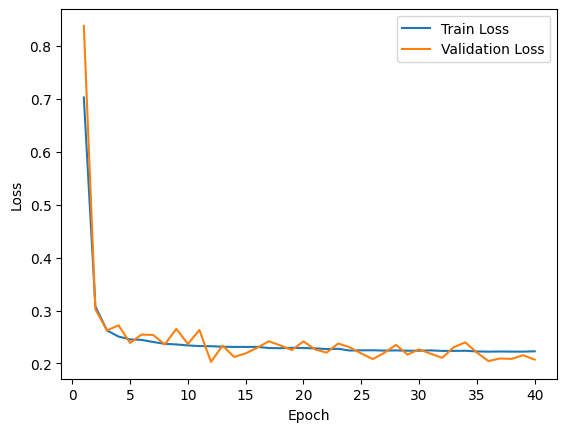

In [26]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# --- TEST EVALUATION ---

model.load_state_dict(torch.load("best_model.pt"))
test_loss = evaluate(model, test_loader, device)

print(f"\nFinal Test Loss: {test_loss:.6f}")


Final Test Loss: 0.152683


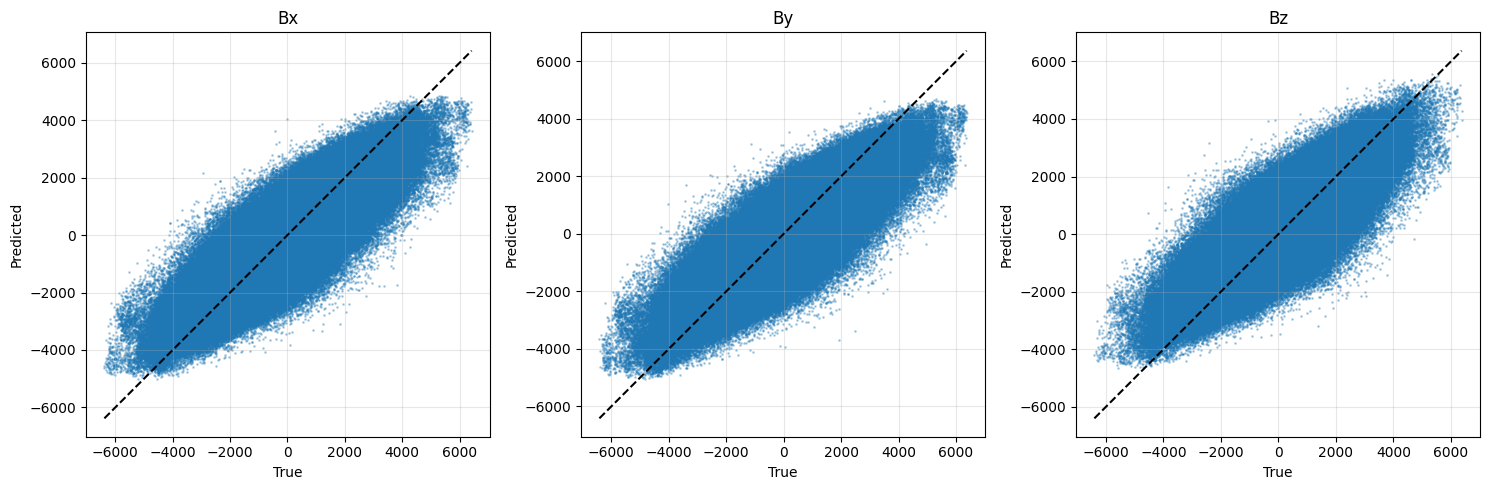

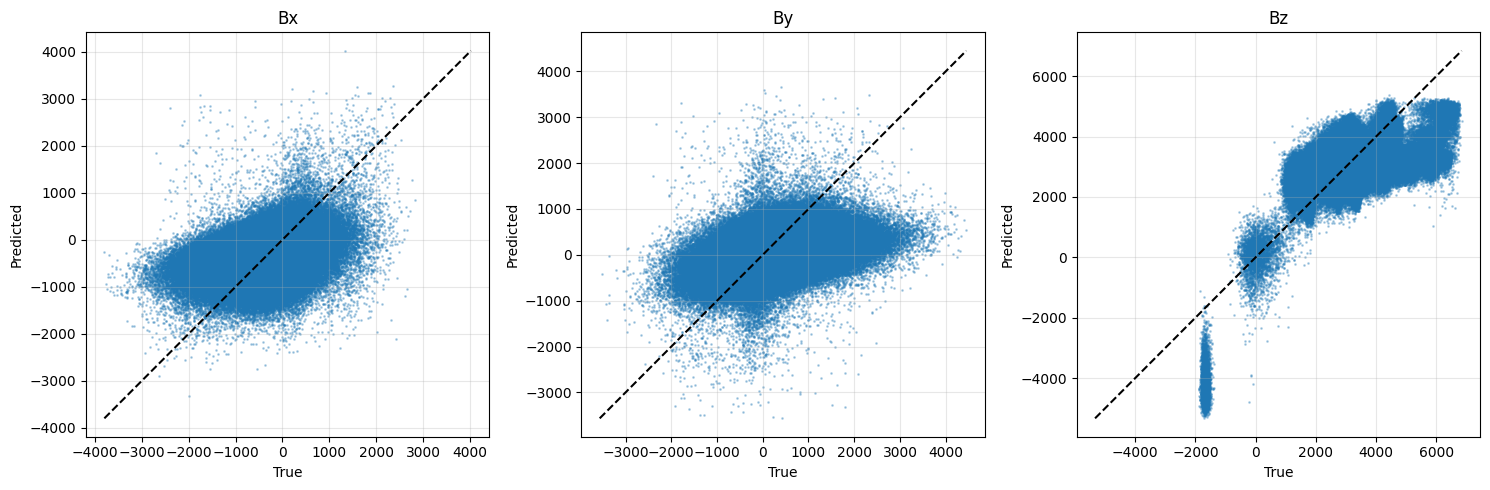

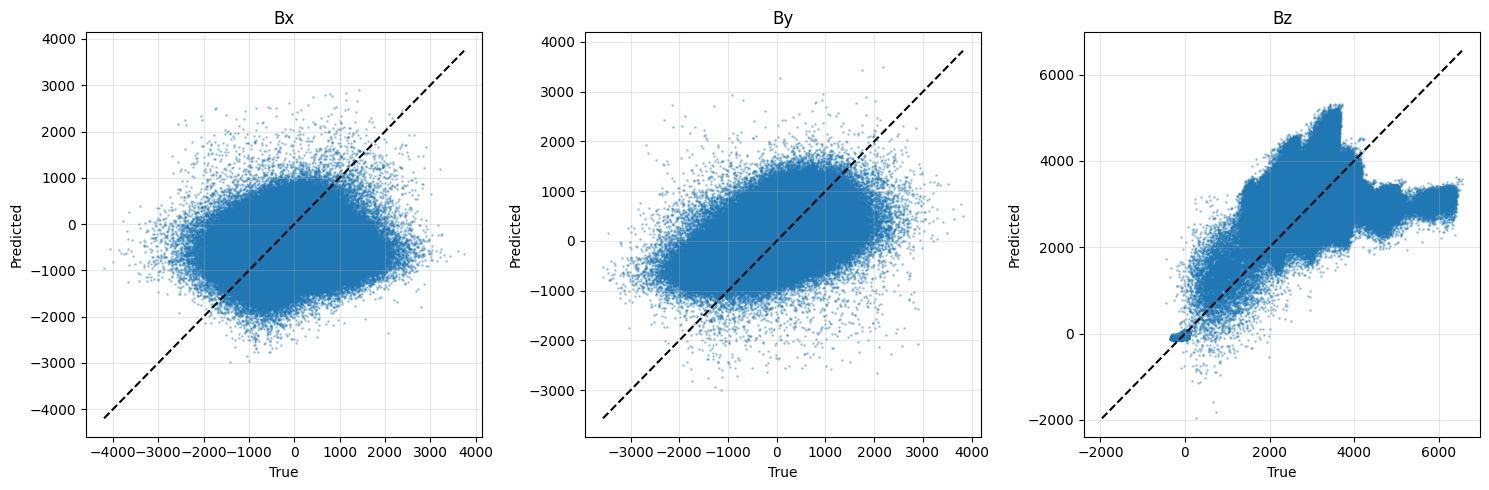

In [ ]:
from p30gnn.FeGdSpinGNN.plots import plot_correlation
plot_correlation(model, train_loader, device, norm_stats['target_mean'], norm_stats['target_std'])
plot_correlation(model, val_loader, device, norm_stats['target_mean'], norm_stats['target_std'])
plot_correlation(model, test_loader, device, norm_stats['target_mean'], norm_stats['target_std'])